# Goal 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Define the data types for each column
data_types = {
    'nameFull':'str',
    'bookingNumber':'str',
    'caseNumber':'str',
    'inmateNumber':'str',
    'housing1':'str',
    'housing1a':'str',
    'housing2':'str',
    'housing3': 'str',
    'nameLast':'str',
    'nameFirst':'str',
    'nameMiddle':'str',
    'age': 'float',
    'sex': 'category',
    'race': 'category',
    'eyeColor': 'category',
    'hairColor': 'category',
    'height': 'float',
    'weight': 'float',
    'bond': 'float',
    'bail': 'float',
    'topcharge': 'category',
    'county':'str'
}

# Specify which columns should be parsed as datetime
date_columns = ['date', 'bookingDate', 'dob', 'firstappearance']

df = pd.read_csv('Cleaned Data/CA.csv',dtype= data_types, parse_dates = date_columns)
# Convert the 'date' and 'firstappearance' columns to datetime objects
#df['date'] = pd.to_datetime(df['date'])
#df['firstappearance'] = pd.to_datetime(df['firstappearance'])
                                          
print(df.dtypes)

nameFull                     object
bookingNumber                object
bookingDate          datetime64[ns]
caseNumber                   object
inmateNumber                 object
housing1                     object
housing1a                    object
housing2                     object
housing3                     object
nameLast                     object
nameFirst                    object
nameMiddle                   object
age                         float64
dob                  datetime64[ns]
sex                        category
race                       category
eyeColor                   category
hairColor                  category
height                      float64
weight                      float64
bond                        float64
bail                        float64
topcharge                  category
firstappearance      datetime64[ns]
county                       object
date                 datetime64[ns]
incarcerated_days             int64
dtype: object


In [44]:
fresno = df[df['county'] == 'Fresno']

# Initialize a set to store unique groups of inmates staying in the same housing3
inmate_groups_fresno = set()

# Group inmates by housing3
grouped_fresno = fresno.groupby(['housing3'])

# Minimum required overlap duration in days
min_overlap_duration = 2  # Adjust this value as needed

# Iterate through groups
for name, group in grouped_fresno:
    if len(group) > 1:
        # Identify overlapping stays within the same housing3
        overlapping_combinations = list(combinations(group['nameFull'], 2))
        for combination in overlapping_combinations:
            #sort the names in alphabetical order
            name1, name2 = sorted(combination)
            
            inmate_numbers = group['nameFull'].values
            date_range_1 = group[group['nameFull'] == combination[0]][['firstappearance', 'date']]
            date_range_2 = group[group['nameFull'] == combination[1]][['firstappearance', 'date']]
            
            # Calculate the overlap duration in days
            overlap_start = max(date_range_1['firstappearance'].min(), date_range_2['firstappearance'].min())
            overlap_end = min(date_range_1['date'].max(), date_range_2['date'].max())
            overlap_duration = (overlap_end - overlap_start).days

            # Check for overlap with a minimum required duration
            if overlap_duration >= min_overlap_duration:
                inmate_groups_fresno.add((name, combination[0], combination[1], overlap_start, overlap_end))
# Create a DataFrame from the set of unique inmate groups
inmate_groups_fresno_df = pd.DataFrame(inmate_groups_fresno, columns=['housing3', 'nameFull1', 'nameFull2', 'firstappearance', 'date'])

# Print the DataFrame with unique inmate groups staying in the same housing3
display(inmate_groups_fresno_df)

,housing3,nameFull1,nameFull2,firstappearance,date
0,"(mj, 05, 0c,)",TRAVIS JOSHI,KEVIN ANDREW AVALOS,2020-11-12,2021-01-04
1,"(mj, 02, 0a,)",TAJ ARLETA JOHNSON,FRANCISCO SALCEDA MEDINA,2020-10-15,2020-10-18
2,"(mj, 03, 0e,)",ELIAS MUHAMMAD,ERIC DONELL MCCOWAN,2020-07-17,2020-12-01
3,"(mj, 03, 0e,)",FRANCISCO MARTINEZ,SHAQUALE MARSHE ODOM,2020-11-17,2020-11-19
4,"(nj, 05, 0a,)",CNOTE ANTHONY DANCY,ANTHONY LOPEZ VENEGAS,2020-10-30,2020-11-16
...,...,...,...,...,...
68087,"(nj, 03, 0c,)",MUSIO ALEJANDRO GOMEZ-RODRIGUEZ,MANUEL GOMEZ GOMEZ,2020-09-20,2021-01-04
68088,"(mj, 03, 0c,)",DARIEN JAMES WILLIAMS,JUSTIN PAUL CALDERON,2021-01-08,2021-01-19
68089,"(nj, 03, 0d,)",DAYLON POTTS,JORGE ANGULO,2020-12-03,2021-06-18
68090,"(nj, 05, 0e,)",FRANCISCO GIL,AL GARY VILLA,2020-12-01,2021-01-18


In [57]:
import pandas as pd

# Assuming you have the DataFrame inmate_groups_fresno_df from your previous data

# Create a new column with sorted name pairs
inmate_groups_fresno_df['sorted_names'] = inmate_groups_fresno_df.apply(
    lambda row: '-'.join(sorted([row['nameFull1'], row['nameFull2']])),
    axis=1
)

# Identify and remove duplicate pairs of records based on the sorted names and given conditions
filtered_inmate_groups_fresno_df = inmate_groups_fresno_df.drop_duplicates(
    subset=['sorted_names', 'firstappearance', 'date'],
    keep='first'
)

# Drop rows where 'nameFull1' equals 'nameFull2'
filtered_inmate_groups_fresno_df = filtered_inmate_groups_fresno_df[filtered_inmate_groups_fresno_df['nameFull1'] != filtered_inmate_groups_fresno_df['nameFull2']]

# Drop the temporary 'sorted_names' column
filtered_inmate_groups_fresno_df = filtered_inmate_groups_fresno_df.drop(columns=['sorted_names'])

# Print the resulting DataFrame
display(filtered_inmate_groups_fresno_df)

,housing3,nameFull1,nameFull2,firstappearance,date
0,"(mj, 05, 0c,)",TRAVIS JOSHI,KEVIN ANDREW AVALOS,2020-11-12,2021-01-04
1,"(mj, 02, 0a,)",TAJ ARLETA JOHNSON,FRANCISCO SALCEDA MEDINA,2020-10-15,2020-10-18
2,"(mj, 03, 0e,)",ELIAS MUHAMMAD,ERIC DONELL MCCOWAN,2020-07-17,2020-12-01
3,"(mj, 03, 0e,)",FRANCISCO MARTINEZ,SHAQUALE MARSHE ODOM,2020-11-17,2020-11-19
4,"(nj, 05, 0a,)",CNOTE ANTHONY DANCY,ANTHONY LOPEZ VENEGAS,2020-10-30,2020-11-16
...,...,...,...,...,...
68087,"(nj, 03, 0c,)",MUSIO ALEJANDRO GOMEZ-RODRIGUEZ,MANUEL GOMEZ GOMEZ,2020-09-20,2021-01-04
68088,"(mj, 03, 0c,)",DARIEN JAMES WILLIAMS,JUSTIN PAUL CALDERON,2021-01-08,2021-01-19
68089,"(nj, 03, 0d,)",DAYLON POTTS,JORGE ANGULO,2020-12-03,2021-06-18
68090,"(nj, 05, 0e,)",FRANCISCO GIL,AL GARY VILLA,2020-12-01,2021-01-18


,nameFull1,nameFull2,frequency
10654,CHARLES DEAN ALBERT,ERNEST RAY HALL,2


   Frequency  Count
0          1  66999
1          2      1


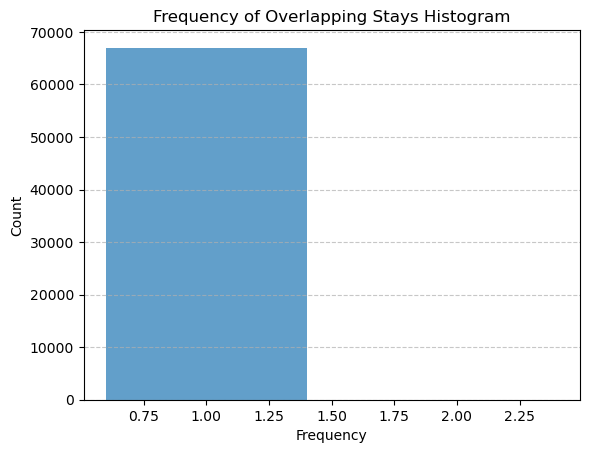

In [58]:
# Group by 'inmateNumber1' and 'inmateNumber2' and count the occurrences
overlap_frequency_fresno = filtered_inmate_groups_fresno_df.groupby(['nameFull1', 'nameFull2']).size().reset_index(name='frequency')
overlap_frequency_morethan1_fresno = overlap_frequency_fresno[overlap_frequency_fresno['frequency'] > 1]
display(overlap_frequency_morethan1_fresno)

# Count the number of unique frequencies
frequency_counts_fresno = overlap_frequency_fresno['frequency'].value_counts().reset_index()
frequency_counts_fresno.columns = ['Frequency', 'Count']

# Sort the DataFrame by frequency for better readability
frequency_counts_fresno = frequency_counts_fresno.sort_values(by='Frequency')

print(frequency_counts_fresno)

# Extract data for the histogram
frequencies = frequency_counts_fresno['Frequency']
counts = frequency_counts_fresno['Count']

# Create a histogram
plt.bar(frequencies, counts, align='center', alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency of Overlapping Stays Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
# Merge the two DataFrames on the 'nameFull' and 'nameFull1' columns
merged_df = filtered_inmate_groups_fresno_df.merge(overlap_frequency_morethan1_fresno, left_on=['nameFull1', 'nameFull2'], right_on=['nameFull1', 'nameFull2'], how='inner')

# Rename the columns
merged_df = merged_df.rename(columns={'firstappearance': 'overlap_start', 'date': 'overlap_end'})

merged_df['county'] = 'Fresno'

# Print the resulting DataFrame with the selected columns
display(merged_df)

,housing3,nameFull1,nameFull2,overlap_start,overlap_end,frequency,county
0,"(mj, 05, 0b,)",CHARLES DEAN ALBERT,ERNEST RAY HALL,2020-11-04,2020-11-06,2,Fresno
1,"(mj, 05, 0f,)",CHARLES DEAN ALBERT,ERNEST RAY HALL,2020-12-08,2021-01-19,2,Fresno


In [54]:
merged_df.to_csv('Overlapping Stays/Fresno.csv', index= False)

In [59]:
filtered_inmate_groups_fresno_df['county'] = 'Fresno'
# Rename the columns
filtered_inmate_groups_fresno_df = filtered_inmate_groups_fresno_df.rename(columns={'firstappearance': 'overlap_start', 'date': 'overlap_end'})
filtered_inmate_groups_fresno_df.to_csv('Goal 5/inmate_groups_fresno_df.csv', index = False)

In [43]:
filtered_inmate_groups_fresno_df.to_csv('Goal 5/inmate_groups_fresno_df.csv', index = False)

In [51]:
# Filter the DataFrame to get rows with the specified names
filtered_df = filtered_inmate_groups_fresno_df[(filtered_inmate_groups_fresno_df['nameFull1'] == "CHARLES DEAN ALBERT")]

# Print the filtered DataFrame
display(filtered_df)

,housing3,nameFull1,nameFull2,firstappearance,date
1098,"(mj, 05, 0b,)",CHARLES DEAN ALBERT,RONNIE BRIAN DAVISON,2020-11-03,2020-11-08
3739,"(mj, 05, 0f,)",CHARLES DEAN ALBERT,MANUEL SOTO,2021-01-03,2021-01-19
6577,"(mj, 05, 0b,)",CHARLES DEAN ALBERT,ERNEST RAY HALL,2020-11-04,2020-11-06
12101,"(mj, 05, 0f,)",CHARLES DEAN ALBERT,ERNEST RAY HALL,2020-12-08,2021-01-19


In [52]:
# Filter the DataFrame to get rows with the specified names
filtered_df = filtered_inmate_groups_fresno_df[(filtered_inmate_groups_fresno_df['nameFull2'] == "CHARLES DEAN ALBERT")]

# Print the filtered DataFrame
display(filtered_df)

,housing3,nameFull1,nameFull2,firstappearance,date
463,"(mj, 05, 0b,)",ANTHONY PIERRE HUMPHREY,CHARLES DEAN ALBERT,2020-11-01,2020-11-08
727,"(mj, 05, 0b,)",CARLOS EDUARDO AMEZOLA,CHARLES DEAN ALBERT,2020-11-01,2020-11-08
1819,"(mj, 05, 0b,)",DAVID RAMIREZ,CHARLES DEAN ALBERT,2020-11-01,2020-11-05
4351,"(mj, 05, 0b,)",CHAUNCEY HARRIS,CHARLES DEAN ALBERT,2020-11-01,2020-11-08
6601,"(mj, 05, 0b,)",GEORGE KAJITANI,CHARLES DEAN ALBERT,2020-11-01,2020-11-08
7451,"(mj, 05, 0b,)",CEDRIC DUPREE COBB,CHARLES DEAN ALBERT,2020-11-01,2020-11-05
8034,"(mj, 05, 0b,)",DRAYTON RANDOLPH WILSON,CHARLES DEAN ALBERT,2020-11-01,2020-11-08
12073,"(mj, 05, 0f,)",ERIC RODRIGUEZ,CHARLES DEAN ALBERT,2020-11-27,2021-01-19
15220,"(mj, 05, 0f,)",PABLO SANCHEZ,CHARLES DEAN ALBERT,2020-11-27,2020-12-29
18275,"(mj, 05, 0b,)",MIONTE DARNELL LEE MINNIEWEATHER,CHARLES DEAN ALBERT,2020-11-01,2020-11-08


In [56]:

display(overlap_frequency_fresno)

,nameFull1,nameFull2,frequency
0,AARON ARENIVAZ,ADRIAN CUEVAS,1
1,AARON ARENIVAZ,ALAN ALONZO JOHNSON,1
2,AARON ARENIVAZ,BENJAMIN VALENCIA,1
3,AARON ARENIVAZ,BRIAN ALLAN PITTMAN,1
4,AARON ARENIVAZ,BRYAN HIPPOLITO OROZCO,1
...,...,...,...
66995,ZHORA PILIPOSYAN,MOSES ROMAN,1
66996,ZHORA PILIPOSYAN,MYRON SINCLAIR HARRIS,1
66997,ZHORA PILIPOSYAN,RUDY ALCALA,1
66998,ZHORA PILIPOSYAN,THOMAS DEAN HIGH,1
